<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/classic_hopfield_network_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing data (irrelevant)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image

response = requests.get("https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py")

if response.status_code == 200:
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")

response = requests.get("https://github.com/kebabee/ML-assiociative-memory/raw/08eb242de52b29dd9ae769b8bb4af3714a884bab/letters/letters.zip")

if response.status_code == 200:
    zip_content = BytesIO(response.content)
    with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        zip_ref.extractall('letters')
    print("Letters extraction successful.")
else:
    print("Failed to download the zip file.")

import hopfield_header as hopf

A = np.where(np.array(Image.open('letters/A.png'))[:,:,0]<128,1,-1).reshape(-1)
N = np.where(np.array(Image.open('letters/N.png'))[:,:,0]<128,1,-1).reshape(-1)
O = np.where(np.array(Image.open('letters/O.png'))[:,:,0]<128,1,-1).reshape(-1)
Z = np.where(np.array(Image.open('letters/Z.png'))[:,:,0]<128,1,-1).reshape(-1)

letters_patterns = [A,N,O,Z]

noised_data = [
  hopf.noise(A, 20),
  hopf.noise(N, 20),
  hopf.noise(O, 20),
  hopf.noise(Z, 20),
  hopf.noise(A, 40),
  hopf.noise(N, 40),
  hopf.noise(O, 40),
  hopf.noise(Z, 40),
  hopf.noise(A, 100),
  hopf.noise(N, 100),
  hopf.noise(O, 100),
  hopf.noise(Z, 100),
  hopf.noise(-A, 20),
  hopf.noise(-N, 20),
  hopf.noise(-O, 20),
  hopf.noise(-Z, 20)
]

hopfield_header.py downloaded successfully.
Letters extraction successful.


# Classic Hopfield network:

The calssic Hopfield Network is a recurrent neural network model, every neuron is connected to each other and send information in both ways.

Information processed by network is vector with the same nuber of elements as number of neurons in network. There is no commonly known input-hidden-output layers structure, the network is input and output layer by itself. The update rule of neuron is given by:
$$\xi_i^{new} = sgn[\sum_j (W_{ij} \xi_j)]$$
where $\xi_i$ is state of neuron and *W* is connections weights matrix. Rules of this matrix are:
$$W_{ij}=\frac{1}{S} \sum_{\mu=1}^S \sum_{i,j}^N x_i^\mu x_j^\mu$$
$$W_{ij}=W_{ji}$$
$$W_{ii}=0$$
Where *x* is pattern vector to remember and *S* is number of patterns.

Whole model have some similar elements with Ising model, so classic Hopfield Network can be described by his own energy function:
$$E = -\frac{1}{2}\sum^N_{i,j} W_{ij} \xi_i \xi_j$$

In every update of neuron the energy is lowered or stays the same. The goal is convergence to energy minima, where most similar pattern is "stored".

Consider 256-neuron with given patterns:


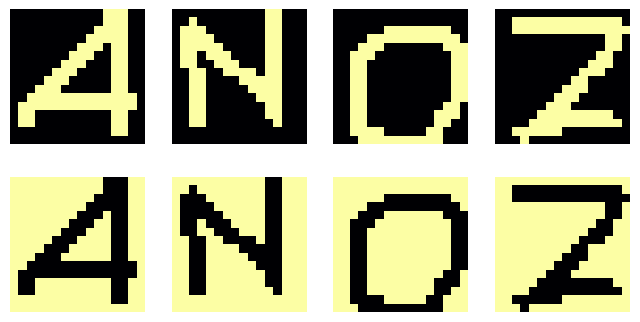

In [8]:
network = hopf.hopfield_net(256)
network.learn([A,N,O,Z])
network.set_patterns([A,N,O,Z,-A,-N,-O,-Z]) # only for plotting

fig, axes = plt.subplots(2, 4, figsize=(8, 4))

for i in range(len(network.patterns)):
    row, col = i // 4, i % 4
    axes[row, col].imshow(network.patterns[i].reshape(16, 16), cmap='inferno')
    axes[row, col].axis('off')
plt.show()

Weights are symmetrical, so network remembers given patterns and their mirror images. We can test the network with this dataset:

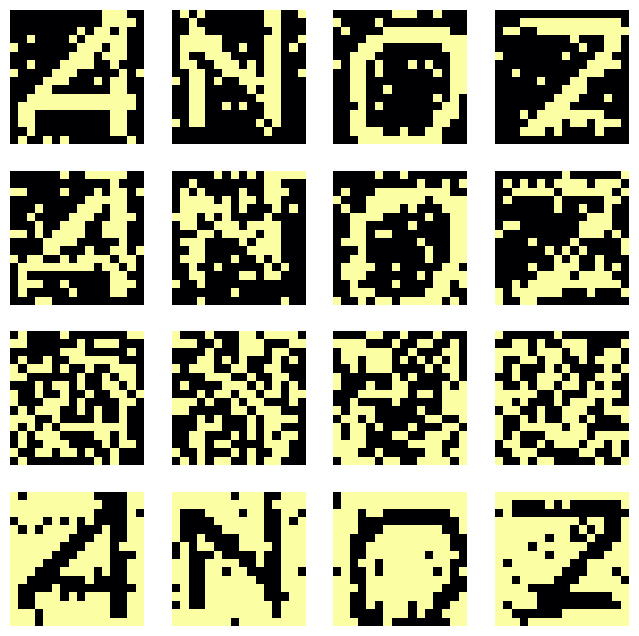

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i in range(len(noised_data)):
    row, col = i // 4, i % 4
    axes[row, col].imshow(noised_data[i].reshape(16, 16), cmap='inferno')
    axes[row, col].axis('off')
plt.show()

The results of network:

Iteration 0, energy: -35.16974360422694
Iteration 1, energy: -35.16974360422694
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -36.1012800793473
Iteration 1, energy: -36.1012800793473
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -34.029354755444544
Iteration 1, energy: -34.029354755444544
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -32.876705254006914
Iteration 1, energy: -32.876705254006914
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -35.16974360422694
Iteration 1, energy: -35.16974360422694
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -36.1012800793473
Iteration 1, energy: -36.1012800793473
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -34.029354755444544
Iteration 1, energy: -34.029354755444544
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -32.876705254006914
Iteration 1, energy: -32.8

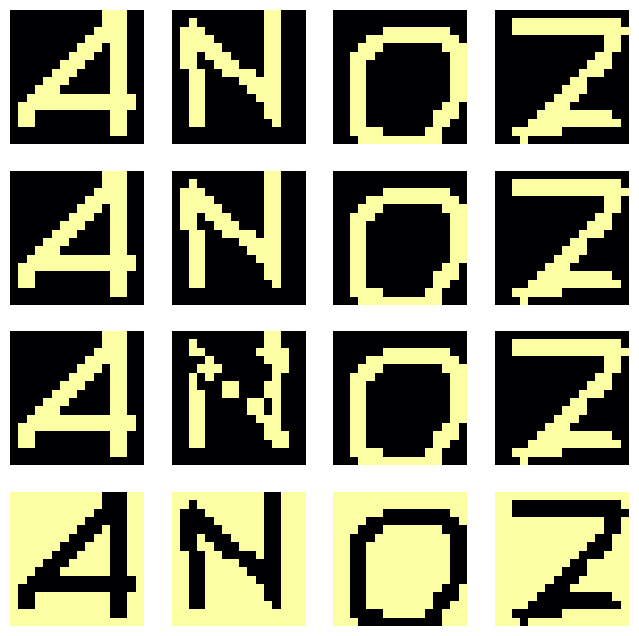

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i in range(len(noised_data)):
  result = network.test(noised_data[i])
  row, col = i // 4, i % 4
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Third row usually gives example of mixed state - network developed local energy minima that do not correspond to any of images in training set.